# Transfer Learning Using FastAI

We use train resnet34 pretrained model to classify the rollers actions : gas and brake (left and right arrow keys)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# The specific torch version for this code
!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install typeguard

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
# Import libraries
from fastai import *
from fastai.vision import *
import random
random.seed(23)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
# drive.flush_and_unmount()

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
path_img = Path('drive/MyDrive/game_data')

# set batch size
bs = 32

# Normalize data based on Image net parameters
data = ImageDataBunch.from_folder(path=path_img, train='train', valid='valid', size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2530 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
RIGHT,RIGHT,RIGHT,RIGHT,RIGHT
Path: drive/MyDrive/game_data;

Valid: LabelList (66 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
LEFT,LEFT,LEFT,LEFT,LEFT
Path: drive/MyDrive/game_data;

Test: None

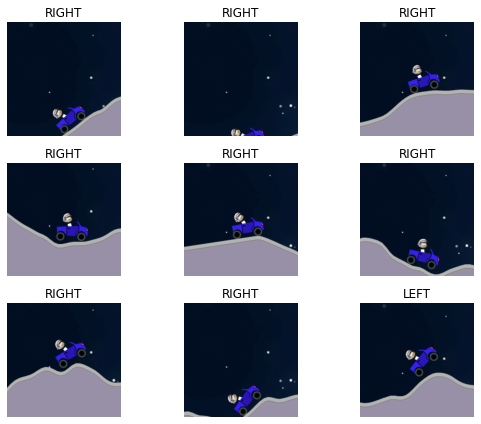

In [ ]:
data.show_batch(rows=3, figsize=(8,6))

In [ ]:
# Define model and metrics
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

# Freeze the earlier layers and keep only the last layer trainable
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.89E-04
Min loss divided by 10: 3.16E-04


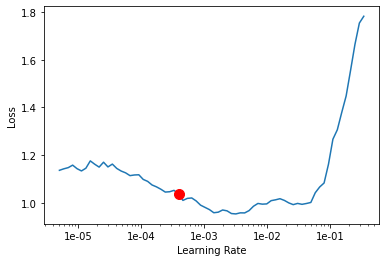

In [ ]:
# Use lr_find to get the optimal learning rate
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.700415,0.559456,0.742424,12:20


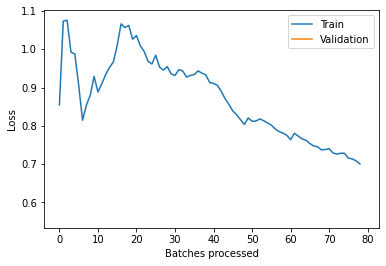

In [ ]:
# Train the model using the lr from the plot for 1 epoch and check
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-2))

learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-05
Min loss divided by 10: 3.98E-05


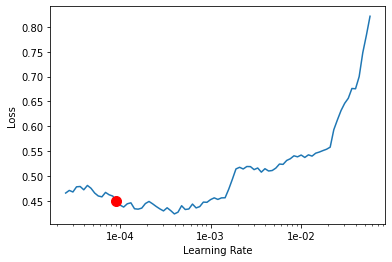

In [ ]:
# Unfreeze all the layers and train the model from scratch
learn.unfreeze()

# Find the learning rate for the fully trainable model
learn.lr_find(start_lr=slice(1e-6, 1e-5), end_lr=slice(1e-2, 1e-1), wd=1e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.489471,0.697749,0.666667,13:44
1,0.393433,0.531563,0.742424,14:04
2,0.250782,0.658567,0.742424,13:47


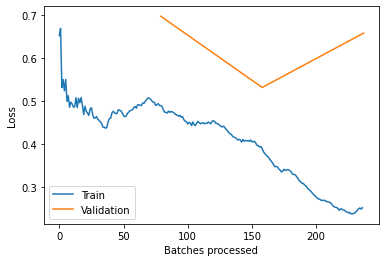

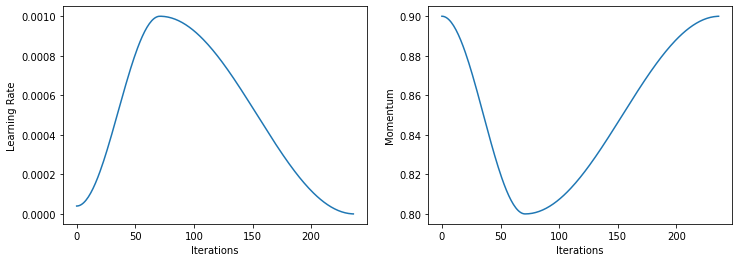

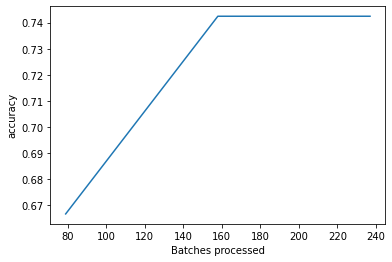

In [ ]:
# Check with the obtained lr for few epochs
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-3), wd=1e-3, moms=(0.9, 0.8))
learn.recorder.plot_losses()
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

epoch,train_loss,valid_loss,accuracy,time
0,0.824198,0.664137,0.742424,12:26
1,0.694244,0.683038,0.757576,12:22
2,0.539770,0.776690,0.757576,12:27
3,0.435695,0.753708,0.742424,12:24
4,0.325404,0.599049,0.787879,12:07
5,0.244392,0.752044,0.772727,12:31
6,0.203601,0.731159,0.757576,12:11
7,0.151031,0.778242,0.742424,12:09
8,0.125055,0.791390,0.742424,12:07
9,0.112758,0.850753,0.727273,12:11


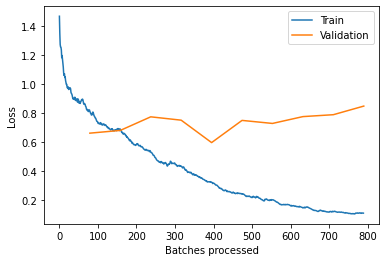

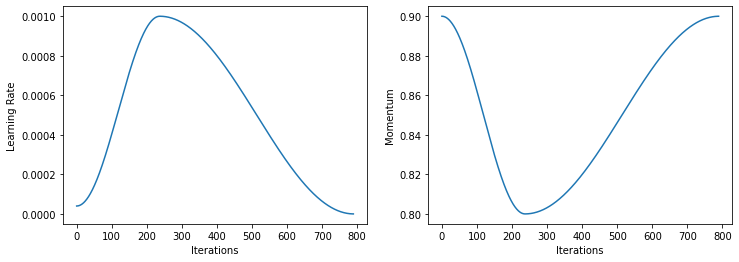

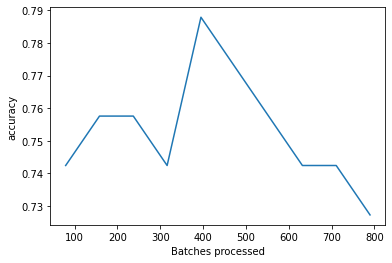

In [ ]:
# Train the model
learn.fit_one_cycle(cyc_len=10, max_lr=slice(1e-4, 1e-3), wd=1e-3, moms=(0.9, 0.8))
learn.recorder.plot_losses()

learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [ ]:
# Save the model (saves in models directory)
learn.save('resnet34_model')